In [ ]:
import pandas as pd
from pandas_datareader import DataReader

In [4]:
from pandas import Series, DataFrame
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
%matplotlib inline

In [7]:
from datetime import datetime

In [8]:
from __future__ import division

In [9]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [10]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [11]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [12]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,198.638175,194.928016,196.705436,196.900635,3.007870e+07,195.394819
std,27.657263,27.737231,27.650818,27.804510,1.246814e+07,28.379880
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,175.967499,173.747501,174.872501,174.832497,2.144010e+07,172.933769
50%,200.010002,196.500000,198.484993,198.680000,2.672145e+07,196.976364
75%,212.267498,208.207504,209.950005,209.312500,3.515955e+07,208.354465
max,268.000000,265.390015,267.899994,267.100006,9.574460e+07,267.100006


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-11-20 to 2019-11-20
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


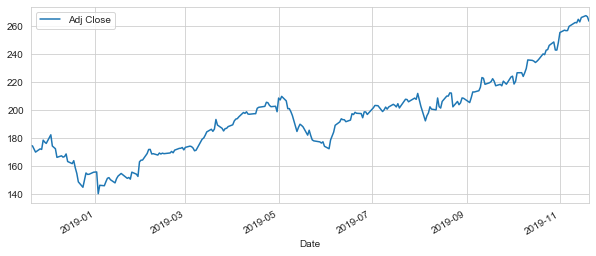

In [14]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

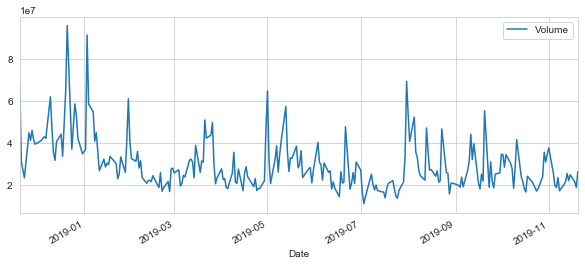

In [15]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [16]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()


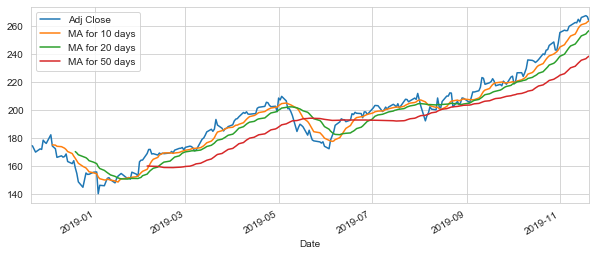

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

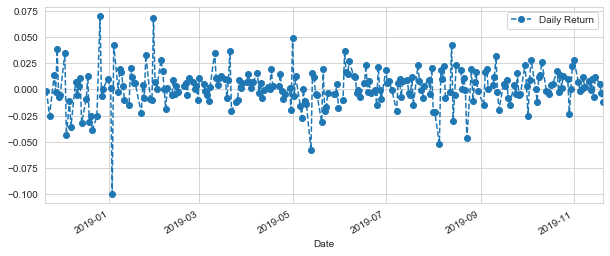

In [19]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

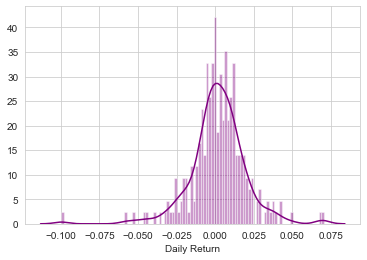

In [20]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

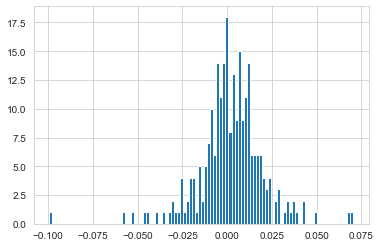

In [21]:
AAPL['Daily Return'].hist(bins=100)

In [22]:
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [23]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-20,174.360245,1025.760010,100.228027,1495.459961
2018-11-21,174.163193,1037.609985,101.607620,1516.729980
2018-11-23,169.739655,1023.880005,101.568207,1502.060059
2018-11-26,172.035172,1048.619995,104.918671,1581.329956
2018-11-27,171.660797,1044.410034,105.578896,1581.420044


In [24]:
tech_rets = closing_df.pct_change()

In [25]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-20,NaN,NaN,NaN,NaN
2018-11-21,-0.001130,0.011552,0.013765,0.014223
2018-11-23,-0.025399,-0.013232,-0.000388,-0.009672
2018-11-26,0.013524,0.024163,0.032987,0.052774
2018-11-27,-0.002176,-0.004015,0.006293,0.000057


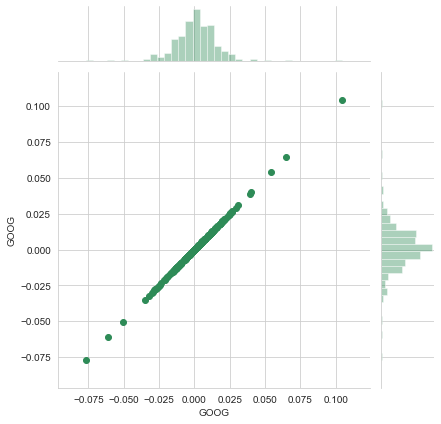

In [26]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter', color='seagreen')

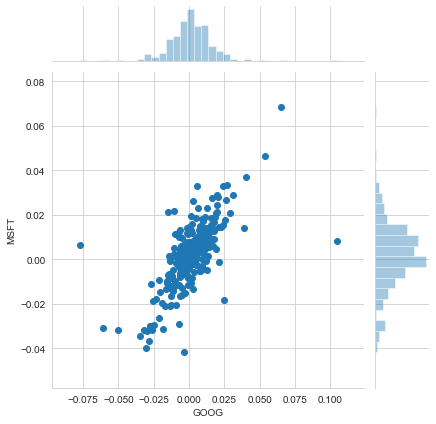

In [27]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [28]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-20,NaN,NaN,NaN,NaN
2018-11-21,-0.001130,0.011552,0.013765,0.014223
2018-11-23,-0.025399,-0.013232,-0.000388,-0.009672
2018-11-26,0.013524,0.024163,0.032987,0.052774
2018-11-27,-0.002176,-0.004015,0.006293,0.000057


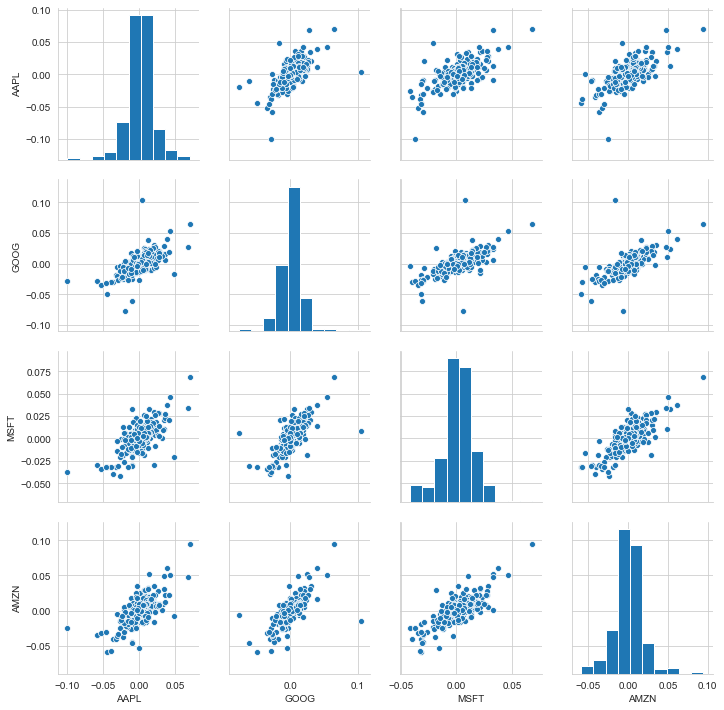

In [29]:
sns.pairplot(tech_rets.dropna())

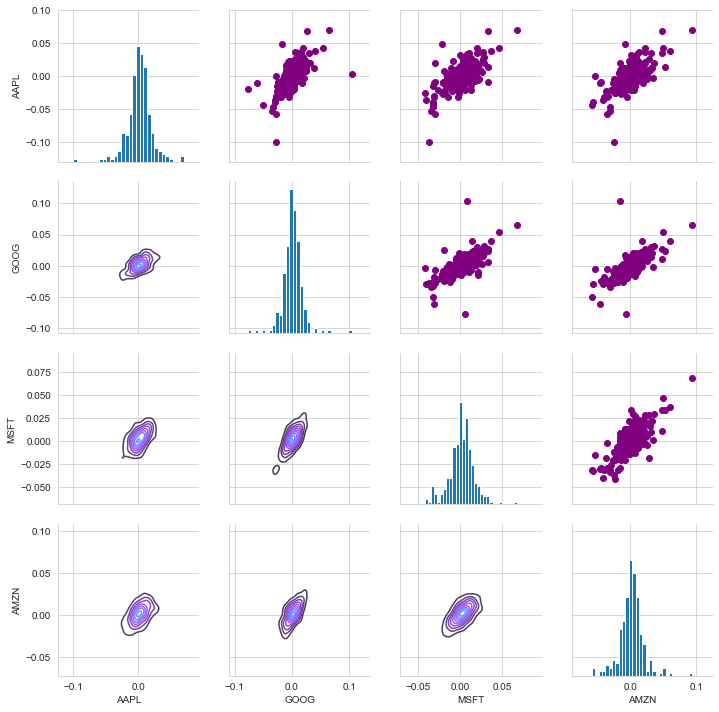

In [30]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

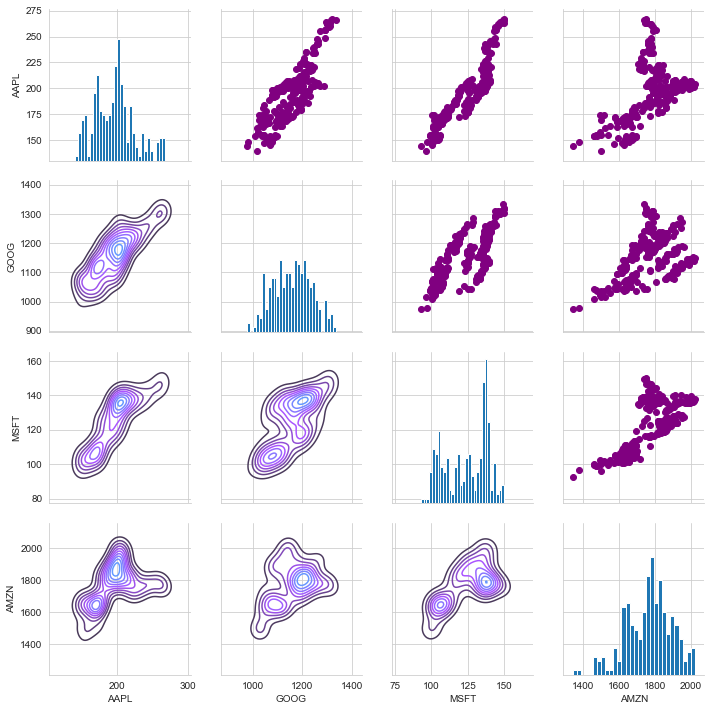

In [31]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

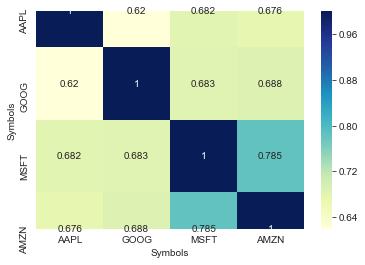

In [32]:
sns.heatmap(tech_rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

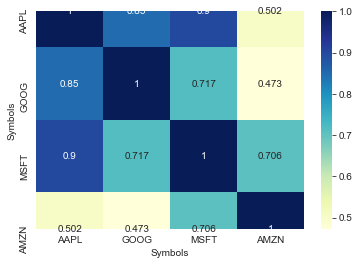

In [33]:
sns.heatmap(closing_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [34]:
    rets = tech_rets.dropna()

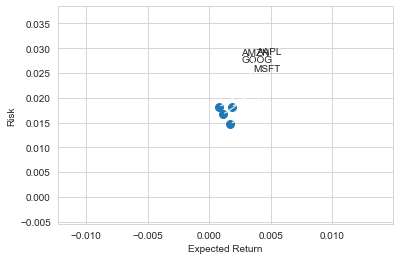

In [35]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext =(50, 50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-0.3'))

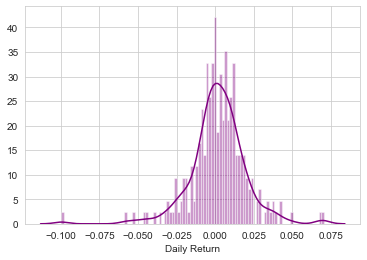

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [37]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-21,-0.001130,0.011552,0.013765,0.014223
2018-11-23,-0.025399,-0.013232,-0.000388,-0.009672
2018-11-26,0.013524,0.024163,0.032987,0.052774
2018-11-27,-0.002176,-0.004015,0.006293,0.000057
2018-11-28,0.038453,0.040042,0.037148,0.060914


In [38]:
rets['AAPL'].quantile(0.05)

-0.025636395372754084

In [39]:
days = 365

dt=1/days

mu=rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [40]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
   
    shock = np.zeros(days)
    drift = np.zeros(days)
    
   
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [41]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-20,1031.739990,996.020020,1000.000000,1025.760010,2449100,1025.760010
2018-11-21,1048.560059,1033.469971,1036.760010,1037.609985,1534300,1037.609985
2018-11-23,1037.589966,1022.398987,1030.000000,1023.880005,691500,1023.880005
2018-11-26,1049.310059,1033.910034,1038.349976,1048.619995,1942800,1048.619995
2018-11-27,1057.579956,1038.489990,1041.000000,1044.410034,1803200,1044.410034


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

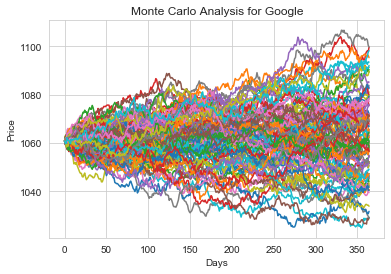

In [42]:
start_price = 1060.790039

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [ ]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):    
    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

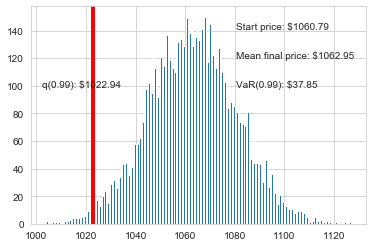

In [46]:
q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')